<a href="https://colab.research.google.com/github/priyanships31/Company_Classification/blob/main/Company_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# from kmeanstf import KMeansTF
from scipy.spatial.distance import cdist
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


In [103]:
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 4/Capstone Project/Company Classification/data_company_classification.csv')

In [104]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   website           73974 non-null  object
 1   company_name      73974 non-null  object
 2   homepage_text     73305 non-null  object
 3   h1                46653 non-null  object
 4   h2                53212 non-null  object
 5   h3                44659 non-null  object
 6   nav_link_text     48050 non-null  object
 7   meta_keywords     23672 non-null  object
 8   meta_description  66886 non-null  object
dtypes: object(9)
memory usage: 5.1+ MB


In [105]:
data.shape

(73974, 9)

In [106]:
data.head()

,website,company_name,homepage_text,h1,h2,h3,nav_link_text,meta_keywords,meta_description
0,bipelectric.com,bip dipietro electric inc,Electrici...,NaN,NaN,NaN,NaN,"electricians vero beach, vero beach electrical...","Providing quality, reliable full service resid..."
1,eliasmedical.com,elias medical,site map | en español Elias Medical h...,Offering Bakersfield family medical care from ...,Welcome to ELIAS MEDICAL#sep#Family Medical Pr...,Get To Know Elias Medical#sep#Family Medical P...,NaN,Elias Medical bakersfield ca family doctor med...,For the best value in Bakersfield skin care tr...
2,koopsoverheaddoors.com,koops overhead doors,Home About Us Garage Door Repair & Servi...,NaN,Customer Reviews#sep#Welcome to Koops Overhead...,NaN,NaN,"Koops Overhead Doors, Albany Garage Doors, Tro...","Koops Overhead Doors specializes in the sales,..."
3,midtowneyes.com,midtown eyecare,918-599-0202 Type Size...,NaN,Welcome to our practice!,NaN,NaN,NaN,We would like to welcome you to Midtown Eyecar...
4,reprosecurity.co.uk,repro security ltd,Simply fill out our form below...,NaN,Welcome to REPRO SECURITY Ltd,NaN,NaN,NaN,Repro Security provide a range of tailor made ...


## Missing value treatment

In [107]:
data[['homepage_text', 'nav_link_text','meta_keywords', 'meta_description']].isnull().sum(axis=1).value_counts()

1    44319
2    14671
0    11660
3     2974
4      350
dtype: int64

In [108]:
data['homepage_text'] = data['homepage_text'].dropna()

In [109]:
df = pd.DataFrame(data, columns = ['homepage_text'])

In [110]:
df = df.dropna()

In [111]:
df['homepage_text'].values

array(['                                     Electricians and electrical contractors serving Vero Beach FL and Indian River County, Florida area for over fifteen years.  Locally owned and operated, Bip DiPietro Electric is dedicated to providing helpful, reliable electrical service to residential, commercial and retail clients alike.  We are fully licensed and insured, and our expert staff of electricians is ready to serve the Vero Beach area any time of the week, day or night.  Bip DiPietro Electric is a full service firm specializing in all areas of Electrical Installation for Commercial and Residential buildings alike. We believe that the job needs to be done and it needs to be done right. All of the employees here at Bip DiPietro Electric strive to give you, our client, exactly what your plans specify and install them the way that they are meant to be installed.   Not only is electricity a necessity these days, but it is also a technology that must be treated with caution and respe

In [112]:
df['homepage_text'].dropna()




0                                             Electrici...
1            site map | en español    Elias Medical   h...
2            Home  About Us  Garage Door Repair & Servi...
3                         918-599-0202        Type Size...
4                        Simply fill out our form below...
                               ...                        
73969                                                     
73970                         Home    About Us    Our S...
73971                                    03 9531 5092 M...
73972                                                  ...
73973                                                  ...
Name: homepage_text, Length: 73305, dtype: object

In [113]:
df.head()

,homepage_text
0,Electrici...
1,site map | en español Elias Medical h...
2,Home About Us Garage Door Repair & Servi...
3,918-599-0202 Type Size...
4,Simply fill out our form below...


In [114]:
df['homepage_text'].isnull().sum()

0

In [115]:
df['homepage_text'] = df['homepage_text'].fillna(' ')

## Removing StopWords

In [116]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
df['homepage_text'].isnull().sum()

0

In [118]:
stop_words = stopwords.words('english')

In [119]:
def stopwords(text):
  text = [word.lower() for word in text.split() if word.lower() not in stop_words]
  return " ".join(text)

In [120]:
df['homepage_text'] = df['homepage_text'].apply(stopwords)

In [121]:

# df['homepage_text'] = df['homepage_text'].str.replace('\d+', '')


In [122]:
df['homepage_text'][5]

'wood green timber co. ltd. wood green tel: 020 8888 7777 potters bar tel: 01707 642 361 londons specialist timber merchants 1st quality 1st service home timber sawn & treated timber oversized/specialist timber joinery timber mouldings hardwood decking fencing sheet materials plywood mdf chipboard sterling board hardboard building supplies plasterboards insulation plaster/bonding/cement aggregates fire rated materials doors roofing tools ironmongery services delivery cutting 1-to-1 customer service sustainability contact contact wood green contact potters bar price matching... comes pricing job, matter big small, clients always looking best possible prices get. north london\'s timber specialists... high stock levels match building requirements. fire-rated materials... fire resistant materials highest standards. 30yrs trading... working relationships clients continue thrive, year year. no.1 service... 1-to-1 customer service. oversized timbers 300mm x 300mm (12"x 12") hold timbers 9.0 m

## Removing Special Characters




In [123]:
import nltk
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [124]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [125]:
def remove_punctuation(text):
    lst = [c for c in text if c not in string.punctuation]
    return ''.join(lst)

In [126]:
df['homepage_text'] = df['homepage_text'].apply(remove_punctuation)

In [127]:
# stop_words = stopwords.words('english')

In [128]:
df['homepage_text'][3]

'9185990202 type size home practice services patient forms eye care articles lasik glaucoma diagnosis cataracts diabetic eye exams location welcome practice excited provide professional eye care services comfortable friendly environment please contact us schedule appointment today click request appointment access forms visit office services provide would like welcome midtown eyecare professionals practice provide patient quality vision solutions exceptional customer service staff experienced areas vision care maintaining healthy eyes requires regular vision eye exams look forward serving you beforehand thank taking time browse website encourage learn dr kyle craig office staff our practice know many choices appreciate interest office contact us 1701 s peoria avenue tulsa ok 74120 phone 9185990202 office hours mon 800  500 pm tue 800  500 pm wed 800  500 pm thu 800  500 pm fri 800  300 pm notice privacy practices website eyefinity'

## Removing Numbers

In [129]:

df['homepage_text'] = df['homepage_text'].str.replace('\d+', '')

In [130]:
df['homepage_text'][3]

' type size home practice services patient forms eye care articles lasik glaucoma diagnosis cataracts diabetic eye exams location welcome practice excited provide professional eye care services comfortable friendly environment please contact us schedule appointment today click request appointment access forms visit office services provide would like welcome midtown eyecare professionals practice provide patient quality vision solutions exceptional customer service staff experienced areas vision care maintaining healthy eyes requires regular vision eye exams look forward serving you beforehand thank taking time browse website encourage learn dr kyle craig office staff our practice know many choices appreciate interest office contact us  s peoria avenue tulsa ok  phone  office hours mon    pm tue    pm wed    pm thu    pm fri    pm notice privacy practices website eyefinity'

## Removing words with 3 or less letters

In [131]:
def remove_words(text):
  # text = [word.lower() for word in text.split() if word.lower() not in stop_words]
  return ' '.join([w for w in text.split() if len(w)>3])

In [132]:
# new_string = ' '.join([w for w in old_string.split() if len(w)>3])
df['homepage_text'] = df['homepage_text'].apply(remove_words)

In [133]:
df['homepage_text'][3]

'type size home practice services patient forms care articles lasik glaucoma diagnosis cataracts diabetic exams location welcome practice excited provide professional care services comfortable friendly environment please contact schedule appointment today click request appointment access forms visit office services provide would like welcome midtown eyecare professionals practice provide patient quality vision solutions exceptional customer service staff experienced areas vision care maintaining healthy eyes requires regular vision exams look forward serving beforehand thank taking time browse website encourage learn kyle craig office staff practice know many choices appreciate interest office contact peoria avenue tulsa phone office hours notice privacy practices website eyefinity'


## Lemmatization

In [134]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import WhitespaceTokenizer as w_tokenizer
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [135]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [136]:
def lemmatize_text(text):
  
  tokens = word_tokenize(text)
  lemmatizer = WordNetLemmatizer()
  l = []
  for token, tag in pos_tag(tokens):
    lemma = lemmatizer.lemmatize(token, tag_map[tag[0]])
    l.append(lemma)
    
  return " ".join(l)

In [137]:
df['homepage_text'] = df['homepage_text'].apply(lemmatize_text)

In [138]:
df['homepage_text'][20]

'javascript seem disabled browser best experience site sure turn javascript browser feedback contact help center tour event calendar skip content toggle search cart branch branch middle street middletown change branch login register result deliver pick call price discontinue product find match criterion search account shop category quick order shop list service location line card contact career chat customer support branch login account account shop category list help center customer service branch number feedback view location click choose technology increase easy button automate inventory management upload logo order account change order list catalog contact upload logo please upload jpeg format image resolution pixel size browse close save change category wire device combination device plug connector receptacle switch wall switch plate power strip multioutlet converter conduit fitting cable tray accessory conduit fitting hanger clamp support metallic conduit nonmetallic conduit elec

In [139]:
def remove_urls_punctuations(text):
  text = re.sub(r"(?:\@|http?\://)\S+", "", text)
  text = re.sub(r"(?:\@|https?\://)\S+", "", text)
  text = re.sub(r"[^\w\s]", "", text)
  return text

In [140]:
df['homepage_text'] = df['homepage_text'].apply(remove_urls_punctuations)

In [141]:
df['homepage_text'][20]

'javascript seem disabled browser best experience site sure turn javascript browser feedback contact help center tour event calendar skip content toggle search cart branch branch middle street middletown change branch login register result deliver pick call price discontinue product find match criterion search account shop category quick order shop list service location line card contact career chat customer support branch login account account shop category list help center customer service branch number feedback view location click choose technology increase easy button automate inventory management upload logo order account change order list catalog contact upload logo please upload jpeg format image resolution pixel size browse close save change category wire device combination device plug connector receptacle switch wall switch plate power strip multioutlet converter conduit fitting cable tray accessory conduit fitting hanger clamp support metallic conduit nonmetallic conduit elec

In [142]:
# from textblob import TextBlob

# def textblob_tokenizer(str_input):
#     blob = TextBlob(str_input.lower())
#     tokens = blob.words
#     words = [token.stem() for token in tokens]
#     return words

## Vectorizing our data

In [143]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(max_df=0.85, min_df=0.1)

# fit the vectorizer using the text data
X = tfid_vectorizer.fit_transform(df['homepage_text'])


In [144]:
X.shape

(73305, 332)

In [145]:
array = X.toarray()

In [146]:
# from sklearn.manifold import TSNE


# data_new = TSNE(perplexity=30).fit_transform(array) 


In [147]:
# type(data_new)

In [148]:
# data_new.shape

In [149]:
df1 = pd.DataFrame(array)
df1.shape

(73305, 332)

In [150]:
# pip install tensorflow-gpu


In [151]:
# pip install kmeanstf


In [152]:
data_new = array

In [153]:

wcss=[]
for i in range(2,18):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data_new)
    wcss.append(kmeans.inertia_)

# plt.plot(range(2,18),wcss ,'bx-')
# plt.title('The Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()

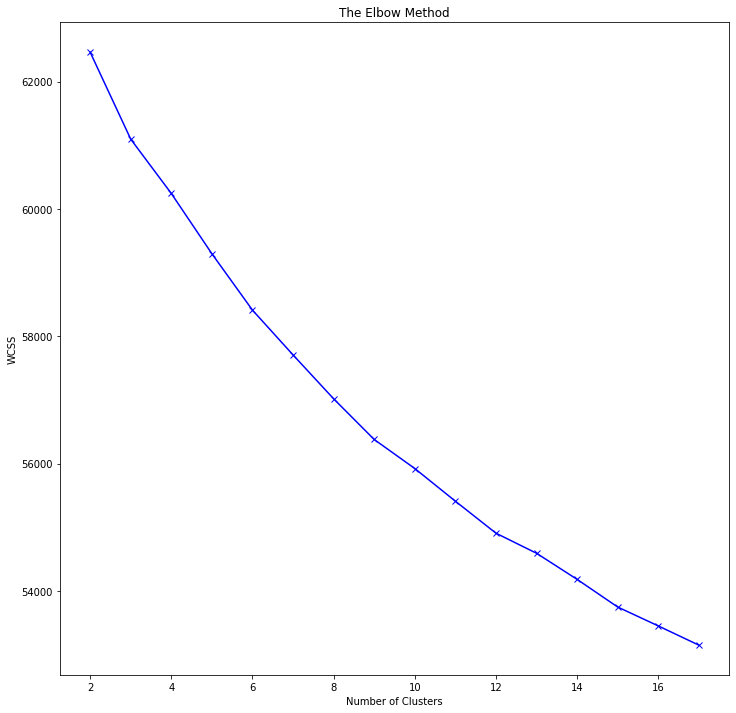

In [154]:
plt.figure(figsize = (12,12))
plt.plot(range(2,18),wcss ,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [155]:

# range_n_clusters = [2,3,4,5,6,7,8,10]
# data_new = data_new.to_numpy()
X = np.array(data_new)
# data_new = data_new.iloc[:,:-1].values
type(data_new)

numpy.ndarray

In [156]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [159]:
# range_n_clusters = np.arange(2,18)

# for n_clusters in range_n_clusters:
#     # Create a subplot with 1 row and 2 columns
#     fig, (ax) = plt.subplots(1)
#     fig.set_size_inches(6, 6)

#     # The 1st subplot is the silhouette plot
#     # The silhouette coefficient can range from -1, 1 but in this example all
#     # lie within [-0.1, 1]
#     ax.set_xlim([-1, 1])
#     # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
#     ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and
#     # seed of 10 for reproducibility.
#     clusterer = KMeans(init = "k-means++" , n_clusters=n_clusters, random_state=10)
#     cluster_labels = clusterer.fit_predict(X)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = silhouette_score(X, cluster_labels)
#     print("For n_clusters =", n_clusters,
#           "The average silhouette_score is :", silhouette_avg)

#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(X, cluster_labels)

#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = \
#             sample_silhouette_values[cluster_labels == i]

#         ith_cluster_silhouette_values.sort()

#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         color = cm.nipy_spectral(float(i) / n_clusters)
#         ax.fill_betweenx(np.arange(y_lower, y_upper),
#                           0, ith_cluster_silhouette_values,
#                           facecolor=color, edgecolor=color, alpha=0.7)

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     ax.set_title("The silhouette plot for the various clusters.")
#     ax.set_xlabel("The silhouette coefficient values")
#     ax.set_ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
#     ax.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax.set_yticks([])  # Clear the yaxis labels / ticks
#     ax.set_xticks([-0.6,-0.4,-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

## Optimal number of clusters from silhouette plot and elbow is n = 12

In [ ]:
kmeans = KMeans(n_clusters=9).fit(array)
centroids = kmeans.cluster_centers_
# print(centroids)

In [ ]:
print(centroids)

In [ ]:
# centroids.get_feature_names()

In [ ]:
centroids = pd.DataFrame(centroids)

In [ ]:
centroids

In [ ]:
kmeans.labels_[:10]

In [ ]:
labels = kmeans.labels_
cluster_df = pd.DataFrame(list(zip(df["homepage_text"],labels)),columns=['homepage_text','cluster'])

In [ ]:
cluster_df.shape

In [ ]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [ ]:
unique

In [ ]:
dict_data = dict(zip(unique, counts))
dict_data

In [ ]:
# data["cluster"] = kmeans.labels_

In [ ]:
# df.head()

In [ ]:
!apt install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
# len(tfid_vectorizer.get_feature_names())

In [ ]:
tfid_vectorizer.vocabulary_

In [ ]:
df_ = pd.DataFrame(array, columns=tfid_vectorizer.get_feature_names())

In [ ]:
df_.head()

In [ ]:
data = df_.T #transposing

In [ ]:
df_.T.sum(axis=1)

In [ ]:
# Words = np.array_str((np.take(tfid_vectorizer.get_feature_names(), cen
centroids.T[0].sort_values(ascending = False)

In [ ]:
centroids

In [ ]:
from collections import Counter
# 

In [ ]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfid_vectorizer.get_feature_names()
for i in range(9):
    words = [terms[ind] for ind in order_centroids[i, :]]
    words_ = Counter(words)
    # print("Cluster {}: {}".format(i, ' '.join(words)))
    
    wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(words_)

    plt.figure(figsize = (15,15))
    plt.title('Cluster {}'.format(i))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
name_of_cluster = {0 : "Consumer Discretionary" , 4: "Insurance services" , 1: "Renewable Energy & products" , 2: "Commercial Services & Supplies" , 3: "Corporate Services and Digital Marketing" , 6: "Real Estates" , 8: "HealthCare" , 7:"Law and financials"}

In [ ]:
# df_name = pd.DataFrame.from_dict(name_of_cluster)
df_name = pd.DataFrame(list(name_of_cluster.items()),columns = ['cluster','name_of_cluster']) 
df_name

In [ ]:
frames = [cluster_df, df_name]

# result = pd.concat(frames,axis=1)
result = pd.merge(cluster_df, df_name,on='cluster')


In [ ]:
result.shape

In [ ]:
result.head()

In [ ]:
# from wordcloud import WordCloud

# true_k = 9
# # result={'cluster':labels,'wiki':wiki_lst}
# result=pd.DataFrame(result)
# for k in range(0,true_k):
#    s=result[result.cluster==k]
#    text=result['homepage_text'].str.cat(sep=' ')
#    text=text.lower()
#    text=' '.join([word for word in text.split()])
#    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
#    print('Cluster: {}'.format(k))
#    print('Titles')
#    titles=wiki_cl[wiki_cl.cluster==k]['title']         
#    print(titles.to_string(index=False))
#    plt.figure()
#    plt.imshow(wordcloud, interpolation="bilinear")
#    plt.axis("off")
#    plt.show()

In [ ]:
# from wordcloud import WordCloud
# # result={'cluster':labels,'wiki':wiki_lst}
# result=pd.DataFrame(result)
# for k in range(0,true_k):
#   #  s=result[result.cluster==k]
#   #  text=s['wiki'].str.cat(sep=' ')
#   #  text=text.lower()
#    text=' '.join([word for word in text.split()])
#    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
#    print('Cluster: {}'.format(k))
#   #  print('Titles')
#   #  titles=wiki_cl[wiki_cl.cluster==k]['title']         
#   #  print(titles.to_string(index=False))
#    plt.figure()
#    plt.imshow(wordcloud, interpolation="bilinear")
#    plt.axis("off")
#    plt.show()

In [ ]:
# wordcloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(centroids[0])
# plt.imshow(wordcloud)

In [ ]:
pip install beautifulsoup4


In [ ]:
pip install gensim 

In [ ]:
import multiprocessing

from gensim.models import Word2Vec

In [ ]:
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['homepage_text']), axis=1)


In [ ]:
df.head()

In [ ]:
# text = df['homepage_text'].values

In [ ]:
model = Word2Vec(df['tokenized_sents'].values, workers=1)

In [ ]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [ ]:
# vectorized_docs.vocab

In [ ]:
vectorized_docs = vectorize(df['tokenized_sents'].values, model=model)
len(vectorized_docs), len(vectorized_docs[0])

In [ ]:
X = model[model.wv.vocab]
Y = model.wv.syn0;


In [ ]:
X

In [ ]:
Y

In [ ]:

wcss=[]
for i in range(2,18):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(vectorized_docs)
    wcss.append(kmeans.inertia_)


In [ ]:
plt.figure(figsize = (15,15))
plt.plot(range(2,18),wcss ,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Optimal number of clusters from silhouette plot and elbow is n = 13

In [ ]:
kmeans = KMeans(n_clusters=7).fit(vectorized_docs)
centroids = kmeans.cluster_centers_
# print(centroids)

In [ ]:
# print(centroids)

In [ ]:
centroids = pd.DataFrame(centroids)

In [ ]:
model.vocabulary

In [ ]:
ssss = model[model.vocab]

In [ ]:
kmeans.labels_[:10]

In [ ]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [ ]:
unique

In [ ]:
dict_data = dict(zip(unique, counts))
dict_data

In [ ]:
z =  model.wv.index2word

In [ ]:
len(model.wv.vocab)


In [ ]:
len(z)

In [ ]:
print(z)

In [ ]:
w = model.wv

In [ ]:
# print(w)

In [ ]:
from collections import Counter
# kmeans.cluster_labels_

In [ ]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
# z = tfid_vectorizer.get_feature_names()
for i in range(7):
    words = [z[ind] for ind in order_centroids[i, :]]
    words_ = Counter(words)
    # print("Cluster {}: {}".format(i, ' '.join(words)))
    
    wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(words_)

    plt.figure(figsize = (15,15))
    plt.title('Cluster {}'.format(i))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()